In [1]:
import csv
import numpy as np
import pandas as pd
import glob
import pickle

In [2]:
from pylab import *

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 100000000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

path = ["/home/petr/datainc/2013", "/home/petr/datainc/2014", "/home/petr/datainc/data_2015",
  "/home/petr/datainc/data_Q1_2016", "/home/petr/datainc/data_Q2_2016",
  "/home/petr/datainc/data_Q3_2016", "/home/petr/datainc/data_Q4_2016",
  "/home/petr/datainc/data_Q1_2017", "/home/petr/datainc/data_Q2_2017"]
#path = ["/home/petr/datainc/2013"]
allFiles = []
for path_ in path:
  allFiles += glob.glob(path_ + "/*.csv")
  
allFiles.sort()

for i, fn in enumerate(allFiles):
  allFiles[i] = [fn, (int(fn[-14:-10])-2013)*12 + int(fn[-9:-7])- 4]


In [5]:
failures_and_total = [[0.,0.] for i in range(max([x[1] for x in allFiles])+1)]

for file_ in allFiles:
  df = pd.read_csv(file_[0], index_col=None, header=0,usecols=["failure"])
  failures_and_total[file_[1]][0] += len(df[df["failure"]==1])
  failures_and_total[file_[1]][1] += len(df)

pickle_out = open("failures_and_total.pickle","wb")
pickle.dump(failures_and_total, pickle_out)
pickle_out.close()


In [6]:
pickle_in = open("failures_and_total.pickle","rb")
failures_and_total = pickle.load(pickle_in)

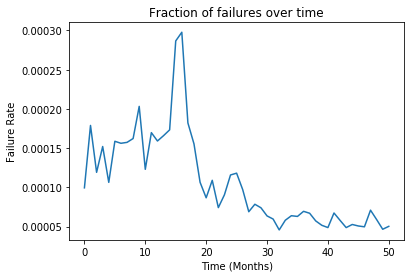

In [7]:
failures_fraction = [x[0]/x[1] for x in failures_and_total]
plt.xlabel("Time (Months)")
plt.ylabel("Failure Rate")
plt.title("Fraction of failures over time")
plt.plot(failures_fraction)
plt.show()